In [2]:
import os
import sys

import matplotlib.pyplot as plt
sys.path.insert(0, "../")


%load_ext autoreload
%autoreload 2

In [3]:
import src.utils.metrics as metrics
meter = metrics.AvgMeter()

/cvlabdata2/home/davydov/miniconda3/envs/hmr_ssl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# accel_err_train.pth  camera_scale_reg_loss_train.pth  kpts2d_loss_train.pth  mpjpe_train.pth  pa_mpjpe_train.pth        smpl_shape_loss_train.pth
# accel_err_valid.pth  camera_scale_reg_loss_valid.pth  kpts2d_loss_valid.pth  mpjpe_valid.pth  pa_mpjpe_valid.pth        smpl_shape_loss_valid.pth
# accel_train.pth      full_train.pth                   kpts3d_loss_train.pth  mpvpe_train.pth  smpl_pose_loss_train.pth  smpl_shape_prior_loss_train.pth
# accel_valid.pth      full_valid.pth                   kpts3d_loss_valid.pth  mpvpe_valid.pth  smpl_pose_loss_valid.pth  smpl_shape_prior_loss_valid.pth

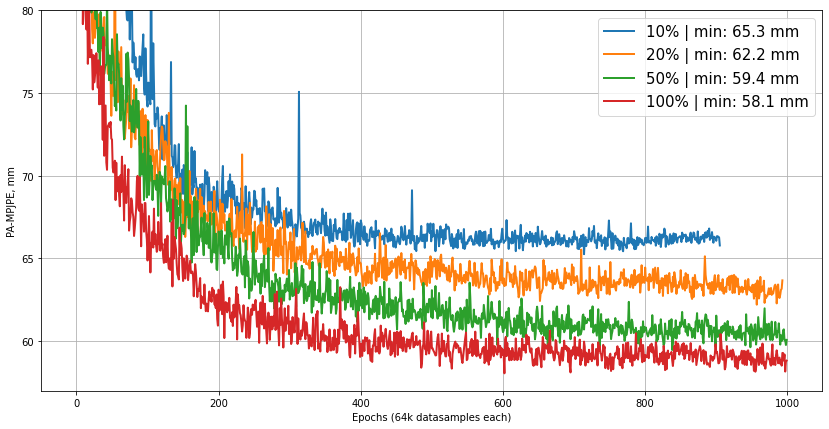

In [7]:
exp_paths = [
#     ["./../output/train_hmr/train_hmr_coco_eft_basic_lr5e-5_no_sched_workers_16_3rd_try/","No Sched lr 5e-5 w16"],
#     ["./../output/train_hmr/train_hmr_coco_eft_basic_lr5e-5_no_sched_workers_8_2nd_try/","100%"],
#     ["./../output/train_hmr/train_hmr_coco_eft_basic_lr5e-5_no_sched_workers_8_2gpu/","No Sched lr 5e-5 w8 2gpus"],
#         ["./../output/train_hmr/train_hmr_coco_eft_basic_lr5e-5_no_sched_workers_16_2gpu/","No Sched lr 5e-5 w16 2gpus"],
    
    ["./../output/train_hmr_fractional/train_hmr_frac__10/","10%"],
    ["./../output/train_hmr_fractional/train_hmr_frac__20/", "20%",],
    ["./../output/train_hmr_fractional/train_hmr_frac__50/","50%"],
    ["./../output/train_hmr/train_hmr_coco_eft_basic_lr5e-5_no_sched_workers_16_2gpu/","100%"], 
]



fig, ax = plt.subplots(1, 1, figsize=(14, 7))
linewidth = 2

for exp_path, add_label in exp_paths:
    meter_path = os.path.join(exp_path, "metrics", "pa_mpjpe_valid.pth")
    meter.load_state(meter_path)
    ax.plot(meter.prev_vals, linewidth=linewidth, label=f"{add_label} | min: {min(meter.prev_vals):.1f} mm")

ax.set_ylabel("PA-MPJPE, mm")
ax.set_xlabel("Epochs (64k datasamples each)")
# ax.set_xlim(0,20)
ax.set_ylim(57,80)
ax.grid()
ax.legend(fontsize=15)
fig.patch.set_facecolor("white")